In [2]:
#construct a decision tree classifier. ~99% accuracy from cross validation

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [3]:
#import feature_extraction

#for i in range(1,10):
#    feature_extraction.extract(i)

In [48]:
datalabels=[]
for i in range(1,10):
    feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
    datalabels.append(datalabelsi)

In [49]:
[x.shape for x in datalabels]

[(2142, 99),
 (2276, 99),
 (1463, 99),
 (2007, 99),
 (2366, 99),
 (2166, 99),
 (1994, 99),
 (2261, 99),
 (0, 99)]

In [50]:
datalabels=np.vstack(datalabels)

In [51]:
#shuffle data
np.random.shuffle(datalabels)

traindata2=datalabels[:,:98]
trainlabels2=datalabels[:,-1]

In [52]:
cls=DecisionTreeClassifier()
cls.fit(traindata2,trainlabels2)
cross_val_score(cls, traindata2, trainlabels2)

array([0.99101366, 0.98758099, 0.98685869])

In [53]:
cls=DecisionTreeClassifier(max_depth=7,min_impurity_decrease=0.0005)
cls.fit(traindata2[:12000],trainlabels2[:12000])
cls.score(traindata2[12000:],trainlabels2[12000:])

0.9674866310160428

In [38]:
y=cls.feature_importances_
a=[[feature_names[i],y[i]] for i in range(len(y))]
a.sort(key=lambda x:-x[1])

In [39]:
a[:20]

[['ankle_gyro_z_std', 0.15123340408113767],
 ['ankle_a16_x_mean', 0.1173272175788139],
 ['chest_a16_y_std', 0.11516548324553397],
 ['hand_a16_freq_0.95', 0.11175882839288862],
 ['chest_B_y_mean', 0.1040430316005186],
 ['hand_a16_x_mean', 0.08353935500907987],
 ['hand_gyro_freq_0.95', 0.07103160838146474],
 ['chest_gyro_y_std', 0.07090546489475401],
 ['ankle_a16_x_std', 0.05456219085335913],
 ['chest_a16_z_mean', 0.021323796149531313],
 ['chest_temp_mean', 0.01892321371928277],
 ['hand_temp_mean', 0.01054533609358787],
 ['hand_a16_z_mean', 0.008624258669135111],
 ['ankle_gyro_y_std', 0.007843568588823086],
 ['ankle_gyro_x_mean', 0.007767374485604666],
 ['chest_a16_y_mean', 0.00748406008149842],
 ['hand_gyro_x_std', 0.006834362488880562],
 ['hand_B_x_mean', 0.006189708254670207],
 ['heart_rate_mean', 0.0055484711903934425],
 ['hand_a16_y_std', 0.004479079211709482]]

In [64]:
activity_dict={0:'other',1:'lying',2:'sitting',3:'standing',4:'walking',5:'running',6:'cycling',7:'nordic walking',
              9:'watching TV',10:'computer work',11:'car driving',12:'ascending stairs',13:'descending stairs',
              16:'vacuum cleaning',17:'ironing',18:'folding laundry',19:'house cleaning',20:'playing_soccer',
              24:'rope jumping'}
class_name=np.array([activity_dict[i] for i in activity_dict.keys()])[1:]

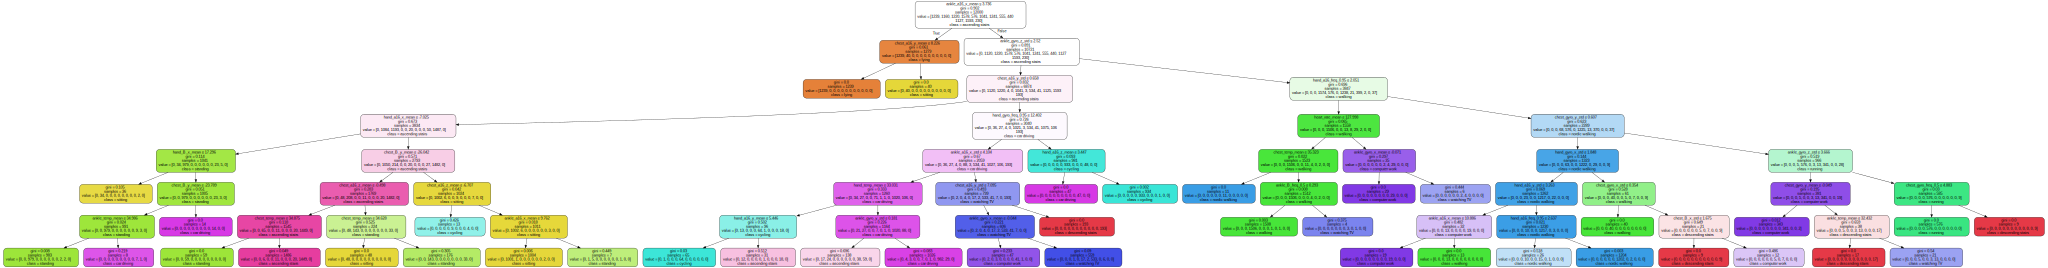

In [41]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(cls, out_file=None, 
                         feature_names=feature_names,  
                         class_names=class_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [42]:
from sklearn.externals.six import StringIO
import pydotplus   #using pydotplus in windows10, python 3.6.X
dot_data = StringIO()

tree.export_graphviz(cls, out_file=dot_data, 
                         feature_names=feature_names,  
                         class_names=class_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

True

In [55]:
#not so fast... check LOSO cross validation!

scores=[]
for iout in range(1,9):

    datalabels=[]
    for i in range(1,iout):
        feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
        datalabels.append(datalabelsi)

    for i in range(iout+1,9):
        feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
        datalabels.append(datalabelsi)

    datalabels=np.vstack(datalabels)

    feature_names,validdatalabels=np.load('data'+str(iout)+'.npy')
    validdata2=validdatalabels[:,:98]
    validlabels2=validdatalabels[:,-1]

    #shuffle data
    np.random.shuffle(datalabels)

    traindata2=datalabels[:,:98]
    trainlabels2=datalabels[:,-1]

    cls=DecisionTreeClassifier()
    cls.fit(traindata2,trainlabels2)

    scores.append(cls.score(validdata2,validlabels2))

In [56]:
scores

[0.5760971055088702,
 0.7623022847100176,
 0.582365003417635,
 0.8858993522670653,
 0.7066779374471682,
 0.8421052631578947,
 0.7442326980942828,
 0.5966386554621849]

In [57]:
np.mean(scores)

0.7120397875081399

In [58]:
#much worse than previous! 
#maybe the overlapping time windows caused contamination between validation and training data...

In [59]:
cls.score(validdata2,validlabels2)

0.5966386554621849

In [61]:
y_pred=cls.predict(validdata2)

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(validlabels2, y_pred)

array([[  0, 216,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 204,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 89,   0, 135,   0,   0,   0,   0,   0,   0,   1,   1,   0],
       [  0,   0,   0, 290,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0, 139,   0,   0,   0,   0,   0,   0,   0],
       [  0,   9,   0,   0,   0, 220,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 263,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   4,  61,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  45,   0,   0,   0],
       [  0,   3,   1,   1,   0,   5,   3,   0,   0, 190,  14,   0],
       [  0,   4,  99,   0,   0,   0,   0,   0,   0, 179,  22,   0],
       [  0,   0,   0,   0,   8,   0,   2,   0,   9,   0,   0,  43]],
      dtype=int64)

In [65]:
class_name

array(['lying', 'sitting', 'standing', 'walking', 'running', 'cycling',
       'nordic walking', 'watching TV', 'computer work', 'car driving',
       'ascending stairs', 'descending stairs', 'vacuum cleaning',
       'ironing', 'folding laundry', 'house cleaning', 'playing_soccer',
       'rope jumping'], dtype='<U17')

In [ ]:
#lying misclassfied as sitting; nordic walking misclassified as walking, 
#soccer misclassfied as house cleaning or standing (!?) a goal keeper?

#maybe need to recalibrate for each subject, ie. normalize data for a given subject?